In [44]:
import numpy as np
import sys
import pandas as pd
import seaborn as sns

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

import matplotlib.pyplot as pyplot
# from sklearn import cross_validation


np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_rows', 200)

In [20]:
dataset = pd.read_csv('./data/datasets/radiomics_features.csv', delimiter=";")
print(dataset.columns)

Index(['Unnamed: 0', 'diagnostics_Versions_PyRadiomics',
       'diagnostics_Versions_Numpy', 'diagnostics_Versions_SimpleITK',
       'diagnostics_Versions_PyWavelet', 'diagnostics_Versions_Python',
       'diagnostics_Configuration_Settings',
       'diagnostics_Configuration_EnabledImageTypes',
       'diagnostics_Image-original_Hash', 'diagnostics_Image-original_Spacing',
       ...
       'original_gldm_HighGrayLevelEmphasis',
       'original_gldm_LargeDependenceEmphasis',
       'original_gldm_LargeDependenceHighGrayLevelEmphasis',
       'original_gldm_LargeDependenceLowGrayLevelEmphasis',
       'original_gldm_LowGrayLevelEmphasis',
       'original_gldm_SmallDependenceEmphasis',
       'original_gldm_SmallDependenceHighGrayLevelEmphasis',
       'original_gldm_SmallDependenceLowGrayLevelEmphasis', 'data_source',
       'diagnosis_code'],
      dtype='object', length=101)


In [23]:
glrlm_features = [
    'original_glrlm_GrayLevelNonUniformity',
    'original_glrlm_GrayLevelNonUniformityNormalized',
    'original_glrlm_GrayLevelVariance',
    'original_glrlm_HighGrayLevelRunEmphasis',
    'original_glrlm_LongRunEmphasis',
    'original_glrlm_LongRunHighGrayLevelEmphasis',
    'original_glrlm_LongRunLowGrayLevelEmphasis',
    'original_glrlm_LowGrayLevelRunEmphasis',
    'original_glrlm_RunEntropy',
    'original_glrlm_RunLengthNonUniformity',
    'original_glrlm_RunLengthNonUniformityNormalized',
    'original_glrlm_RunPercentage',
    'original_glrlm_RunVariance',
    'original_glrlm_ShortRunEmphasis',
    'original_glrlm_ShortRunHighGrayLevelEmphasis',
    'original_glrlm_ShortRunLowGrayLevelEmphasis',
    'diagnosis_code'
]

In [24]:
glrlm_data = dataset[glrlm_features]
glrlm_data.head()

,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,diagnosis_code
0,635.753957,0.386393,0.496164,8.268450,35.813432,288.762641,5.060246,0.158820,4.497523,311.977481,0.184203,0.260483,20.093459,0.395367,3.289589,0.068192,0
1,100.800524,0.442746,0.394778,4.750947,98.657191,397.543169,24.777872,0.334272,4.352583,33.633307,0.144202,0.162536,57.144109,0.357881,1.848319,0.162828,0
2,203.260491,0.371405,0.534773,8.789703,20.836573,162.810393,3.144840,0.151618,4.285351,119.509055,0.209518,0.315380,9.630667,0.425230,3.967911,0.065593,0
3,468.332549,0.441406,0.375363,6.396881,52.591406,280.362610,11.312171,0.213631,4.590949,161.579461,0.142472,0.230447,26.613673,0.313535,2.136343,0.075928,0
4,204.505786,0.402929,0.450018,5.116707,77.439949,316.954686,20.285264,0.323571,4.638538,76.931386,0.145197,0.184493,45.386818,0.353462,1.941529,0.142502,0


In [58]:
from xgboost import plot_importance

important_features = [
    'original_glrlm_GrayLevelNonUniformity',
    'original_glrlm_GrayLevelNonUniformityNormalized',
#     'original_glrlm_GrayLevelVariance',
    'original_glrlm_LongRunHighGrayLevelEmphasis',
    'original_glrlm_LongRunLowGrayLevelEmphasis',
    'original_glrlm_RunEntropy',
    'original_glrlm_RunLengthNonUniformity',
    'original_glrlm_ShortRunEmphasis',
    'diagnosis_code'
]
print(glrlm_data.columns)

Index(['original_glrlm_GrayLevelNonUniformity',
       'original_glrlm_GrayLevelNonUniformityNormalized',
       'original_glrlm_GrayLevelVariance',
       'original_glrlm_HighGrayLevelRunEmphasis',
       'original_glrlm_LongRunEmphasis',
       'original_glrlm_LongRunHighGrayLevelEmphasis',
       'original_glrlm_LongRunLowGrayLevelEmphasis',
       'original_glrlm_LowGrayLevelRunEmphasis', 'original_glrlm_RunEntropy',
       'original_glrlm_RunLengthNonUniformity',
       'original_glrlm_RunLengthNonUniformityNormalized',
       'original_glrlm_RunPercentage', 'original_glrlm_RunVariance',
       'original_glrlm_ShortRunEmphasis',
       'original_glrlm_ShortRunHighGrayLevelEmphasis',
       'original_glrlm_ShortRunLowGrayLevelEmphasis', 'diagnosis_code'],
      dtype='object')


Accuracy: 72.22%
Accuracy: 77.78%
Accuracy: 72.22%
Accuracy: 58.33%
Accuracy: 66.67%
Accuracy: 77.78%
Accuracy: 69.44%
Accuracy: 66.67%
Accuracy: 58.33%
Accuracy: 72.22%
Accuracy: 66.67%
Accuracy: 77.78%
Accuracy: 77.78%
Accuracy: 80.56%
Accuracy: 72.22%
Accuracy: 75.00%
Accuracy: 66.67%
Accuracy: 58.33%
Accuracy: 72.22%
Accuracy: 72.22%
Accuracy: 86.11%
Accuracy: 77.78%
Accuracy: 58.33%
Accuracy: 66.67%
Accuracy: 63.89%
Average accuracy: 70.56%


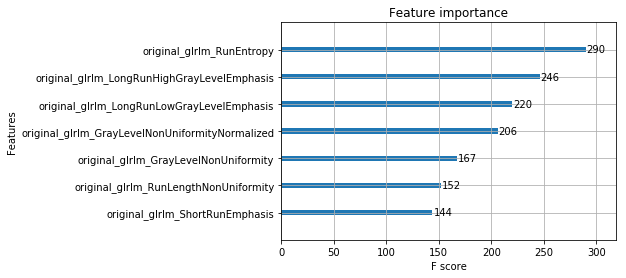

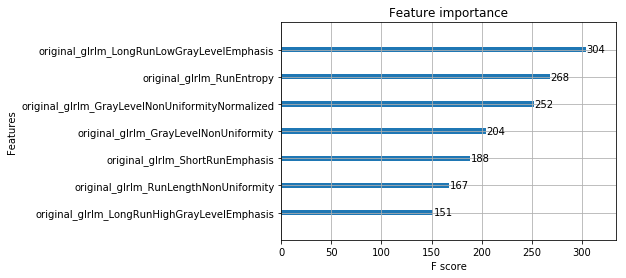

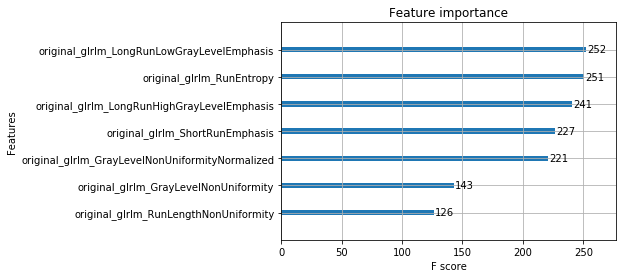

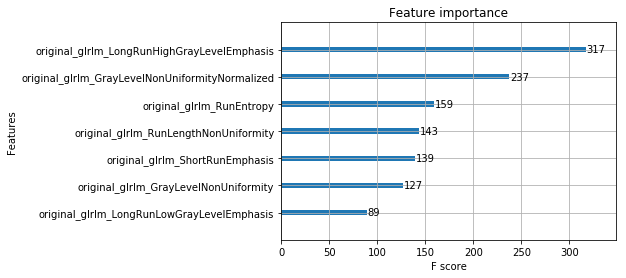

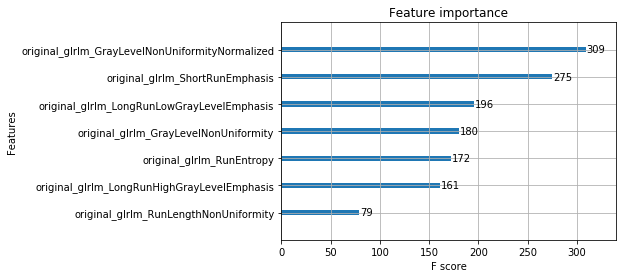

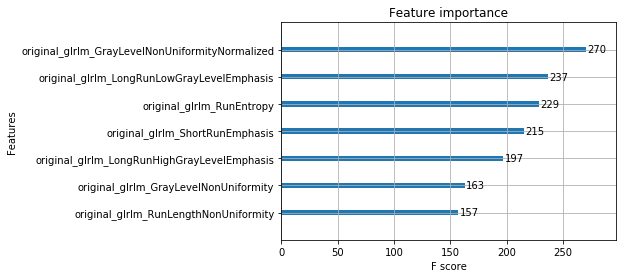

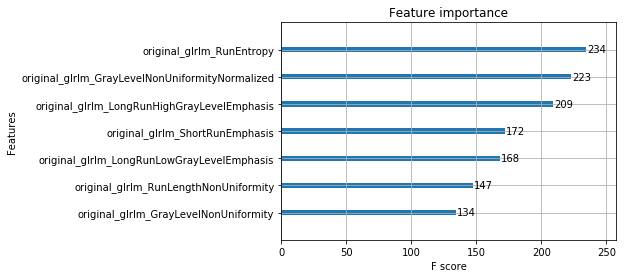

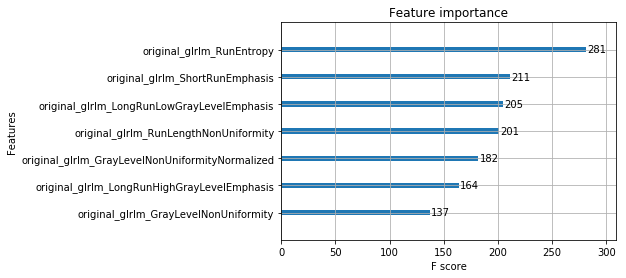

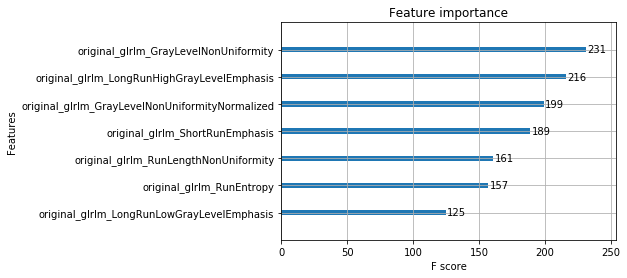

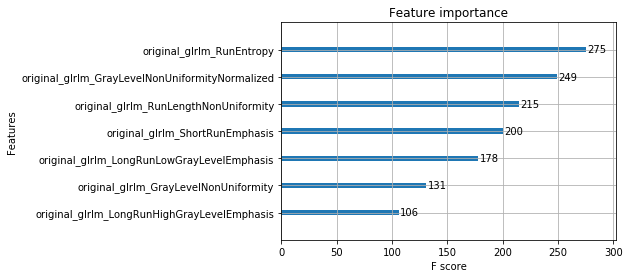

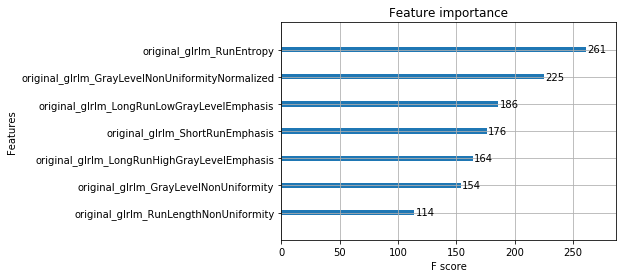

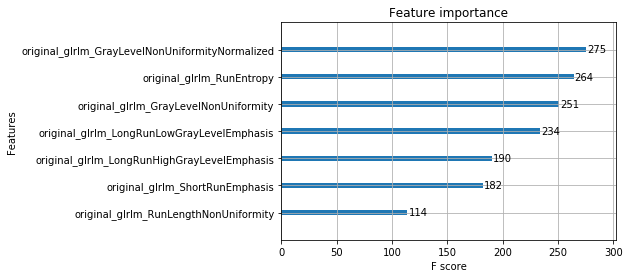

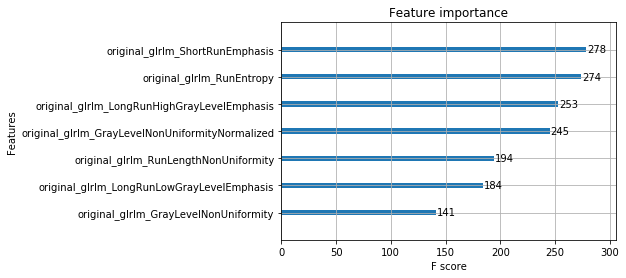

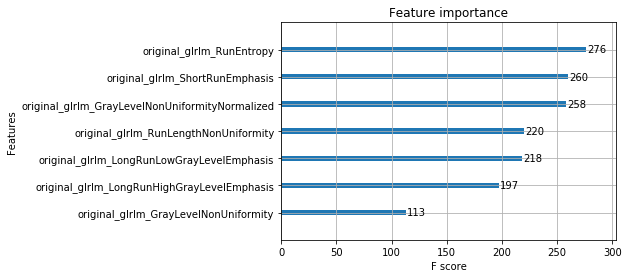

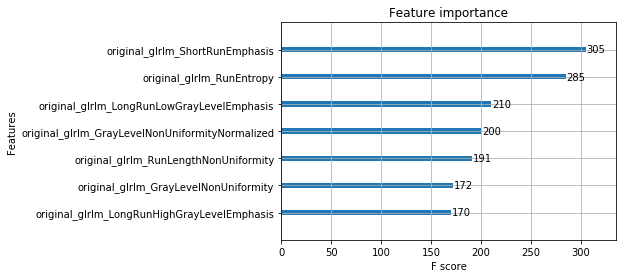

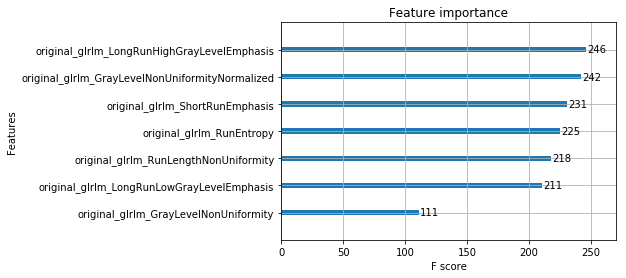

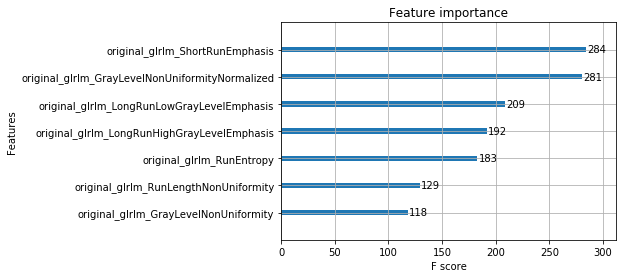

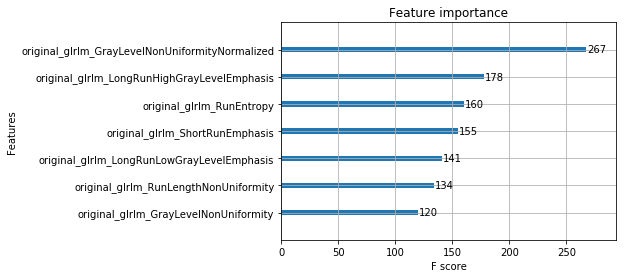

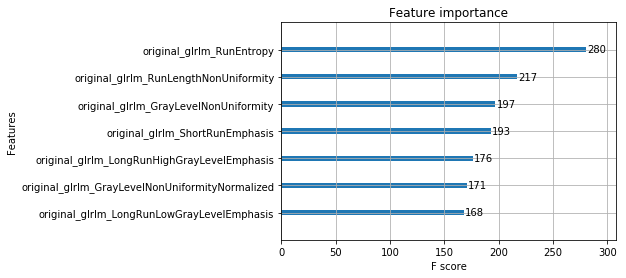

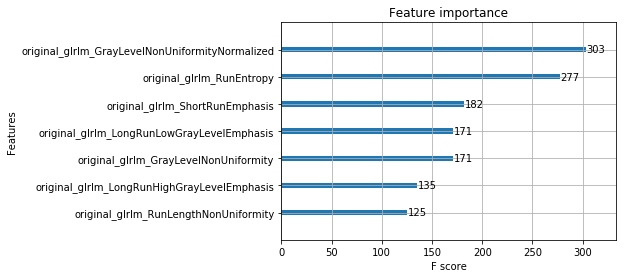

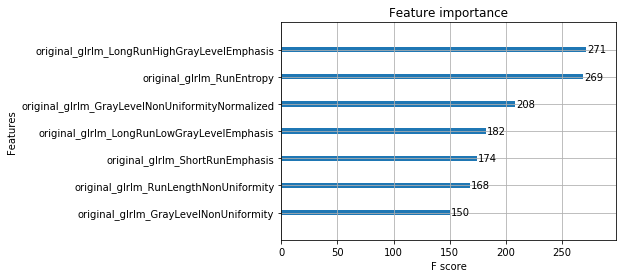

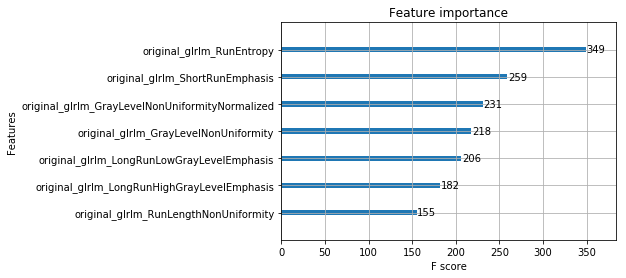

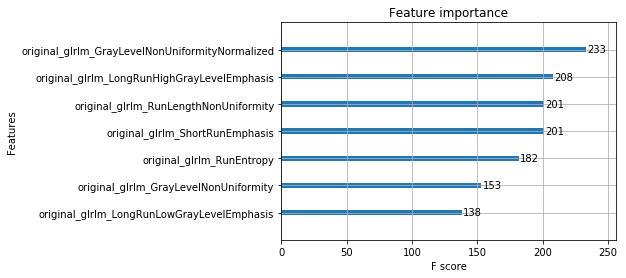

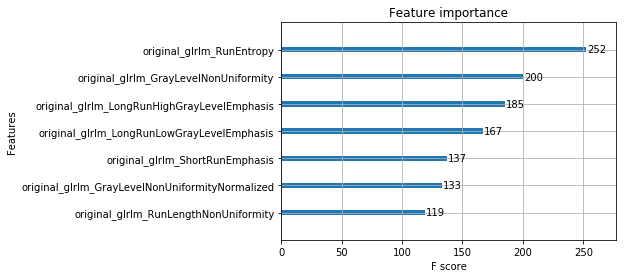

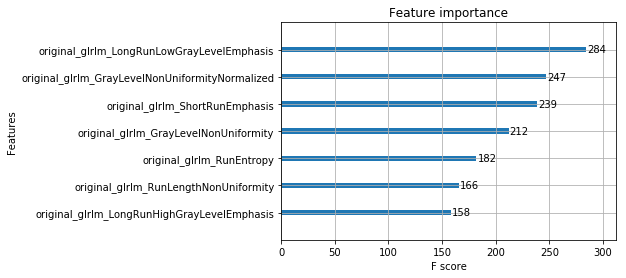

In [59]:
imp_glrlm_data = glrlm_data[important_features]
X = imp_glrlm_data.iloc[:, :-1]
Y = imp_glrlm_data.iloc[:, -1]

test_size = 0.33

model = XGBClassifier()

acc = []

for i in range(25):
    seed = i
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
    model.fit(X_train, y_train)
    
#     print(model.feature_importances_)
#     pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
#     pyplot.show()
    plot_importance(model)
    y_pred = model.predict(X_test)
    
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    acc.append(accuracy)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

print('Average accuracy: %.2f%%' % (np.asarray(acc).mean() * 100.0))

In [7]:

dataset.head()

,Unnamed: 0,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Hash,diagnostics_Image-original_Spacing,...,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,data_source,diagnosis_code
88,88,2.1.2,1.14.2,1.2.0,0.5.2,3.6.8,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},04b4d0fff2765fc8363c727a220f796946150de3,"(1.0, 1.0, 1.0)",...,1.888130,57.021858,93.350941,47.982763,0.781341,0.027790,0.070543,0.017813,hpb7,3
26,26,2.1.2,1.14.2,1.2.0,0.5.2,3.6.8,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},5001242c6830e8a1517beddc6be97d70e3c87cfb,"(1.0, 1.0, 1.0)",...,5.565027,49.155660,260.657345,12.196459,0.254715,0.035905,0.221169,0.010626,norm26,0
62,62,2.1.2,1.14.2,1.2.0,0.5.2,3.6.8,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},89afcab5a084eb054c2a8d46649c4d1797e4c8e5,"(1.0, 1.0, 1.0)",...,8.076299,53.761688,433.289286,8.259599,0.164986,0.041691,0.330515,0.009004,norm62,0
71,71,2.1.2,1.14.2,1.2.0,0.5.2,3.6.8,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},e0e894d4dd8eadc2f82e68a90463319afe69ba02,"(1.0, 1.0, 1.0)",...,18.631395,44.256033,835.917833,2.652208,0.062511,0.039172,0.683484,0.003053,auh3,1
8,8,2.1.2,1.14.2,1.2.0,0.5.2,3.6.8,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},24d7b80a40c9f89c2a177a0f288d5f4befce02e2,"(1.0, 1.0, 1.0)",...,6.594067,48.480874,315.128806,8.868695,0.184395,0.045214,0.320352,0.009311,norm8,0


In [206]:
dataset = pd.read_csv('./datasets/glrlm_0_sep_diseases.csv', sep=',', index_col=0).sample(frac=1)
dataset = dataset[dataset['isPatho'] <= 1]
X = dataset.iloc[:, :-1]
Y = dataset.iloc[:, -1]

seed = 123
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))



Accuracy: 96.00%


In [237]:
from sklearn.neighbors import KNeighborsClassifier
dataset = pd.read_csv('./datasets/glrlm_0_sep_diseases.csv', sep=',', index_col=0).sample(frac=1)
dataset = dataset[dataset['isPatho'] <= 1]

X = dataset.iloc[:, :-1]
Y = dataset.iloc[:, -1]
seed = 123
test_size = 0.4
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
neig = KNeighborsClassifier(n_neighbors=5)
neig.fit(X_train, y_train)
prob = neig.predict_proba(X_test)
pred = neig.predict(X_test)
# print(prob)
# print(pred)

accuracy = accuracy_score(y_test, neig.predict(X_test))
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 93.33%


In [240]:
from sklearn import svm
dataset = pd.read_csv('./datasets/glrlm_0_sep_diseases.csv', sep=',', index_col=0).sample(frac=1)
dataset = dataset[dataset['isPatho'] <= 1]

X = dataset.iloc[:, 1:-1]
Y = dataset.iloc[:, -1]
seed = 123
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
clf = svm.SVC(gamma='scale')
clf.fit(X_train, y_train)
accuracy = accuracy_score(y_test, clf.predict(X_test))
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 86.67%


In [242]:
from sklearn import svm
dataset = pd.read_csv('./datasets/glrlm_0_sep_diseases.csv', sep=',', index_col=0).sample(frac=1)
dataset = dataset[dataset['isPatho'] <= 1]

X = dataset.iloc[:, 1:-1]
Y = dataset.iloc[:, -1]
seed = 123
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
accuracy = accuracy_score(y_test, clf.predict(X_test))
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 93.33%


In [ ]:
predicted = clf.predict(X_test)

def calc_accuracy(predicted, y_test):
    if len(predicted) != len(y_test):
        print("Function parameters must be the same size!")
        return

    true_answers = sum(int(predicted[i] == y_test[i]) for i in range(len(y_test)))
    
    return float(true_answers/float(len(y_test)))

calc_accuracy(predicted, y_test.values)


In [1]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
dataset = pd.read_csv('./datasets/glrlm_0_unit.csv', sep=',', index_col=0).sample(frac=1)

seed = 123
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
svc = svm.SVC(kernel='linear', gamma=.004, C=100)
svc.fit(X_train, y_train)

NameError: name 'X' is not defined

In [ ]:
dataset = pd.read_csv('./datasets/glrlm_0_unit.csv', sep=',', index_col=0).sample(frac=1)
X = dataset.iloc[:, 1:-1]
Y = dataset.iloc[:, -1]

seed = 123
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [ ]:
clf = svm.SVC(gamma='scale')
clf.fit(X, y)
clf = svm.SVC(gamma='scale')
clf.fit(X_train, y_train) 

In [ ]:
X_train